# Volume 3: Pandas 1 (Introduction)
    Eric Riddoch
    Section 2
    May 4, 2019 

In [147]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from colorama import Fore, Back

%matplotlib inline

In [151]:
def printb(string):
    return Fore.BLUE + string + Fore.BLACK

## Problem 1
Read in the file *crime_data.csv* into a pandas object. The file contains data on types of crimes in the U.S. from 1960 to 2016. Set the index as the column *Year*.

Create a new column 'Rate' which has the crime rate for each year. Use this table to answer the following questions:

1) What is the mean crime rate? In what years was the crime rate above the mean?

2) On average, using the mean, what is the least common crime?

3) Identify two crimes which have close means. Do these two crimes have any kind of correlation from year to year? If so, what is this correlation?

Years when the crime rate was above the mean
Year
1974    1974
1975    1975
1976    1976
1977    1977
1978    1978
1979    1979
1980    1980
1981    1981
1982    1982
1983    1983
1984    1984
1985    1985
1986    1986
1987    1987
1988    1988
1989    1989
1990    1990
1991    1991
1992    1992
1993    1993
1994    1994
1995    1995
1996    1996
1997    1997
1998    1998
1999    1999
Name: Year, dtype: int64


Year  Population    Total  Violent  Property  Murder  Forcible Rape  \
Year                                                                        
1960  1960   179323175  3384200   288460   3095700    9110          17190   
1961  1961   182992000  3488000   289390   3198600    8740          17220   
1962  1962   185771000  3752200   301510   3450700    8530          17550   
1963  1963   188483000  4109500   316970   3792500    8640          17650   
1964  1964   191141000  4564600   364220   4200400    9360          21420   

      Robbery  Aggravated Assault  Burglary  Larceny  Vehicle Theft  
Year                                                                 
1960   107840              154320    912100  1855400         328200  
1961   106670              156760    949600  1913000         336000  
1962   110860              164570    994300  2089600         366800  
1963   116470              174210   1086400  2297800         408300  
1964   130390              203050   1213200  2514400         472800

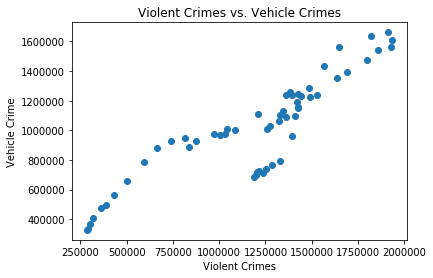

In [167]:
data = pd.read_csv('crime_data.csv', delimiter=',')
data = data.set_index(data['Year'])

# compute crime rate
mean_population = data['Population'].mean()
mean_total_crime = data['Total'].mean()
crime_rate = mean_total_crime / mean_population

# print years when crime rate was higher than the mean
mask = list(data['Total'] / data['Population'] > crime_rate)
print(printb("Years when the crime rate was above the mean"))
print(data.iloc[mask, 0])

# I used this line to identify which two categories were close
# data.describe().T.sort_values('mean', ascending=False)

# plot the categories against each other to check for correlation
data[['Violent', 'Vehicle Theft']].sort_values('Violent', ascending=True)
plt.scatter(data['Violent'], data['Vehicle Theft'])
plt.title("Violent Crimes vs. Vehicle Crimes")
plt.ylabel('Vehicle Crime')
plt.xlabel('Violent Crimes')

# show data
data.head()

<ol style="color: green; font-weight: bold; font-size: 18px;">
    <li>The mean crime rate is 4.2% </li>
    <li>The crime with the lowest mean is *murder* </li>
    <li>Interestingly, violent crimes seem to be positively correlated with vehicle crimes.</li>
</ol>

## Problem 2
Answer the following questions using the pandas numerical methods. Support your answers with data from the file.

1) In what year did each crime hit an all-time high in the U.S.? In what year did the majority of crimes hit an all-time high?

2) Which decade had the greatest amount of total crime?

3) During this decade, which crime was commited most, and what percent of the total crime was it?

In [197]:
"""This way is the numpy equivalent"""
# for column in data.columns:
#     argmax = pd.argmax(data[column])
#     print(column, "was the highest in", str(argmax) + ":", data[column][argmax])

"""Better in Pandas"""
# 1.a) What year did each crime hit an all-time high?
print(printb("Years with the most crime"))
print(pd.DataFrame.idxmax(data, axis=0)[3:]) # see years

print()
print(printb("No. of Crimes in those years"))
print(pd.DataFrame.max(data, axis=0)[3:])    # see actual values
print()

# which decade had the greatest total amount of crime?
data["Decade"] = (data["Year"] // 10) * 10     # add a decade column
print(printb("Total crime each decade"))
print(data.groupby(data.Decade).Total.sum().sort_values(ascending=False)) # group the data by decade, and sum the Total column

# in the 90s, which crime was committed the most. What % of total crime was it?
nineties = data.groupby(data.Decade).sum().loc[1990]
nineties = nineties.drop(['Year', 'Population'])
nineties.drop('Total').idxmax() # determine which crime was most committed: Property
nineties.Property / nineties.Total

Years with the most crime
Violent               1992
Property              1991
Murder                1991
Forcible Rape         1992
Robbery               1991
Aggravated Assault    1993
Burglary              1980
Larceny               1991
Vehicle Theft         1991
Decade                2010
dtype: int64

No. of Crimes in those years
Violent                1932270
Property              12961100
Murder                   24700
Forcible Rape           109060
Robbery                 687730
Aggravated Assault     1135610
Burglary               3795200
Larceny                8142200
Vehicle Theft          1661700
Decade                    2010
dtype: int64

Total crime each decade
Decade
1990    136582146
1980    131123369
2000    115012044
1970    100991600
2010     68547737
1960     49295900
Name: Total, dtype: int64


0.8716622376104707

<ol style="color: green; font-weight: bold; font-size: 18px;">
    <li>In *1991* the most crimes were at their peak </li>
    <li>The *90s* had the greatest total amount of crime </li>
    <li>*Property* crimes were the most frequent in the 90s. <br/> Property crime made up 87.17% of all crime that. decade</li>
</ol>

## Problem 3
Using panda commands, find the crime rates of the years where Property crimes were less than 90% of the total crime **and** burglary crimes were more than 20% of the total crime **or** property crimes were less than 90% of the total crime **and** violent crimes were more than 12% of the total crime.

In [228]:
# add a crime rate column
data['Crime Rate'] = data['Total'] / data['Population']

# define masks for the search criteria
property_greater = (data['Property'] / data['Total']) < 0.90
burglary_less    = (data['Burglary'] / data['Total']) > 0.20
violent_greater  = ( data['Violent'] / data['Total']) > 0.12

# combine the masks
mask = (property_greater & burglary_less) | (property_greater & violent_greater)
data.loc[mask]

Year  Population     Total  Violent  Property  Murder  Forcible Rape  \
Year                                                                         
1972  1972   208230000   8248800   834900   7413900   18670          46850   
1973  1973   209851000   8718100   875910   7842200   19640          51400   
1980  1980   225349264  13408300  1344520  12063700   23040          82990   
1981  1981   229146000  13423800  1361820  12061900   22520          82500   
1982  1982   231534000  12974400  1322390  11652000   21010          78770   
1983  1983   233981000  12108600  1258090  10850500   19310          78920   
1984  1984   236158000  11881800  1273280  10608500   18690          84230   
1985  1985   238740000  12431400  1328800  11102600   18980          88670   
1986  1986   240132887  13211869  1489169  11722700   20613          91459   
1987  1987   242282918  13508700  1483999  12024700   20096          91110   
1988  1988   245807000  13923100  1566220  12356900   20680          92490   
1989  1989   248239000  14251400  1646040  12605400   21500          94500   
1990  1990   248709873  14475600  1820130  12655500   23440         102560   
1991  1991   252177000  14872900  1911770  12961100   24700         106590   
1992  1992   255082000  14438200  1932270  12505900   23760         109060   
1993  1993   257908000  14144800  1926020  12218800   24530         106010   
1994  1994   260341000  13989500  1857670  12131900   23330         102220   
1995  1995   262755000  13862700  1798790  12063900   21610          97470   
1996  1996   265228572  13493863  1688540  11805300   19650          96250   
1997  1997   267637000  13194571  1634770  11558175   18208          96153   
1998  1998   270296000  12475634  1531044  10944590   16914          93103   
1999  1999   272690813  11634378  1426044  10208334   15522          89411   
2000  2000   281421906  11608072  1425486  10182586   15586          90178   
2001  2001   285317559  11876669  1439480  10437480   16037          90863   
2005  2005   296507061  11565499  1390745  10174754   16740          94347   
2006  2006   299398484  11401511  1418043   9983568   17030          92757   
2007  2007   301621157  11251828  1408337   9843481   16929          90427   
2008  2008   304374846  11160543  1392628   9767915   16442          90479   
2009  2009   307006550  10762956  1325896   9337060   15399          89241   
2010  2010   309330219  10363873  1251248   9112625   14772          85593   
2011  2011   311587816  10258774  1206031   9052743   14661          84175   
2012  2012   313873685  10219059  1217067   9001992   14866          85141   
2013  2013   316497531   9850445  1199684   8650761   14319          82109   
2014  2014   318907401   9395195  1186185   8209010   14164          84864   
2015  2015   320896618   9258298  1234183   8024115   15883          91261   
2016  2016   323127513   9202093  1283058   7919035   17250          95730   

      Robbery  Aggravated Assault  Burglary  Larceny  Vehicle Theft  Decade  \
Year                                                                          
1972   376290              393090   2375500  4151200         887200    1970   
1973   384220              420650   2565500  4347900         928800    1970   
1980   565840              672650   3795200  7136900        1131700    1980   
1981   592910              663900   3779700  7194400        1087800    1980   
1982   553130              669480   3447100  7142500        1062400    1980   
1983   506570              653290   3129900  6712800        1007900    1980   
1984   485010              685350   2984400  6591900        1032200    1980   
1985   497870              723250   3073300  6926400        1102900    1980   
1986   542775              834322   3241410  7257153        1224137    1980   
1987   517704              855088   3236184  7499900        1288674    1980   
1988   542970              910090   3218100  7705900        1432900    1980   
1989   578330 

## Problem 4
Read in the files *final_accidents2.pickle* and *final_drivers.pickle* using the function *read_pickle()*.  
The accidents file contains data on various accidents that occurred in the U.S. and their causes.
The drivers data has data on various tickets given to drivers, how many tickets given, and what the ticket is for.

Create a dataframe containing case number, age, and fatalities using an inner join operation on the Case Number. In this dataframe, also include the speed column from each dataframe.
Create a second dataframe using an outer join.

Use these dataframe to answer the following questions. Make sure to support your claims with appropriate and presentable data.

1. What is the most common kind of weather involved with accidents?

2. How many accidents involved speeding?

3. What is the most common type of speeding in accidents?

4. Rounding to the nearest integer, what is the mean number of drunk drivers involved in each accident?

5. What is the mean number of fatalities per accident each year?

6. What month has the most fatalities each year?

In [241]:
accidents = pd.read_pickle('final_accidents2.pickle')
drivers = pd.read_pickle('final_drivers.pickle')
print(printb("ACCIDENTS: data recorded when accidents occur"))
accidents.head()

ACCIDENTS: data recorded when accidents occur


ST_CASE  STATE  LATITUDE  LONGITUD  HOUR  DAY  MONTH  YEAR  DRUNK_DR  \
0    10001      1     32.64    -85.35     4   15      1  2010         1   
1    10002      1     31.43    -86.96     6   11      1  2010         0   
2    10003      1     30.69    -88.09    15   14      1  2010         0   
3    10004      1     33.87    -86.29     1   21      1  2010         0   
4    10005      1     33.31    -86.79     6    4      1  2010         0   

   WEATHER  SP  FATALS  
0        1   0       1  
1        1   0       1  
2        1   1       1  
3        2   0       1  
4        1   0       1

In [240]:
print(printb("DRIVERS: data from tickets given to drivers"))
drivers.head()

DRIVERS: data from tickets given to drivers


ST_CASE  VEH_NO  AGE  DRINKING  SPEEDREL  YEAR
0    10001       1   51         9         0  2010
2    10002       1   44         0         0  2010
3    10003       1   27         9         1  2010
4    10003       2   45         0         0  2010
5    10003       3   28         0         0  2010

In [255]:
"""select 
            Drivers.ST_CASE, 
            Drivers.AGE,           
            Drivers.DRINKING,      # caused by drunk driver
            Accidents.DRUNK_DR,    # whether driver had dui's
            Accidents.FATALS       # No. of fatalities
   from 
            Accidents FULL OUTER JOIN Drivers
   on
            Drivers.ST_CASE = Accidents.ST_CASE
"""

alchohol = pd.merge(accidents, drivers, how="outer", on="ST_CASE")[['ST_CASE', 'AGE', 'DRINKING', 'DRUNK_DR', 'FATALS']]

"""
    select
        Drivers.ST_CASE,
        Drivers.AGE,
        Drivers.SPEEDREL
        Accidents.FATALS
    from
        Drivers INNER JOIN Accidents
    on
        Drivers.ST_CASE = Accidents.ST_CASE
"""

age_fatals = pd.merge(drivers, accidents, how="inner", on="ST_CASE")[['ST_CASE', 'AGE', 'FATALS']]

"""
    select
        
        
"""

ST_CASE  AGE  FATALS
0          10001   51       1
1          10001   51       1
2          10001   51       1
3          10001   51       2
4          10001   51       1
5          10001   55       1
6          10001   55       1
7          10001   55       1
8          10001   55       2
9          10001   55       1
10         10001   22       1
11         10001   22       1
12         10001   22       1
13         10001   22       2
14         10001   22       1
15         10001   28       1
16         10001   28       1
17         10001   28       1
18         10001   28       2
19         10001   28       1
20         10001   24       1
21         10001   24       1
22         10001   24       1
23         10001   24       2
24         10001   24       1
25         10002   44       1
26         10002   44       1
27         10002   44       1
28         10002   44       1
29         10002   44       1
...          ...  ...     ...
1053208   490228   26       1
1053209   490229   34       2
1053210   490230   32       1
1053211   490231   31       2
1053212   490231   34       2
1053213   530435   84       1
1053214   530436   18       1
1053215   530437   32       1
1053216   530437   18       1
1053217   530438   35       1
1053218   530439   46       1
1053219   530440   32       1
1053220   530442   26       1
1053221   530443   68       1
1053222   530444   58       1
1053223   530444   50       1
1053224   530444   30       1
1053225   530445   25       1
1053226   530445   55       1
1053227   530447   67       1
1053228   530448   64       1
1053229   530449   20       1
1053230   530449   47       1
1053231   530450   33       1
1053232   530451   78       1
1053233   530451   45       1
1053234   530451   46       1
1053235   530452   38       1
1053236   530452   61       1
1053237   530453   31       1

[1053238 rows x 3 columns]

In [1]:
import pandas1 as p

# for i in range(2, 6):
#     eval(f'print(p.prob{i}())')
    
p.prob5()

/home/jovyan/work/pandas1.py:166: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ans2 = df.sort_values('Murder')[(df.Year > 2000) & (df['Aggravated Assault'] > 850_000)]['Aggravated Assault'].values


('Property',
 array([909023, 891407, 859030, 862220, 855856, 860853]),
 0.8716622376104707)

In [3]:
!pip install colorama